In [1]:
import numpy as np
import pandas as pd
from numpy.random import randn

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# make a kd plot manually
dataset  = randn(25)

(0, 1)

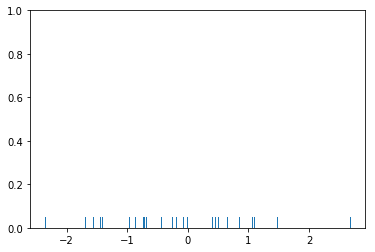

In [4]:
sns.rugplot(dataset)
plt.ylim(0,1)
# every point is a tick on that plot

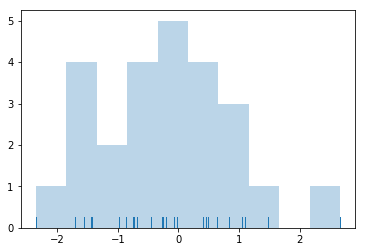

In [6]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)
# as one can see then the histogram is just counting
# the number of ticks in each bin.

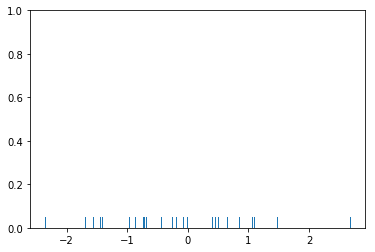

In [7]:
# represent each tick with a guassian 
sns.rugplot(dataset)

x_min = dataset.min()-2
x_max = dataset.max()+2

x_axis = np.linspace(x_min,x_max,100)

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**0.2

kernel_list = []
for data_point in dataset:
    # create a kernel for reach point
    # append it to the kernel_list
    kernel = stats.norm(dataset,bandwith).pdf(x_axis)
    kernel_list.append(kernel)
    
    # scale for plotting
    kernel = kernel/kernel.max()
    

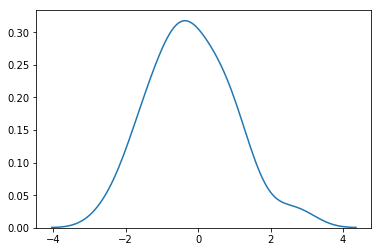

In [8]:
sns.kdeplot(dataset)

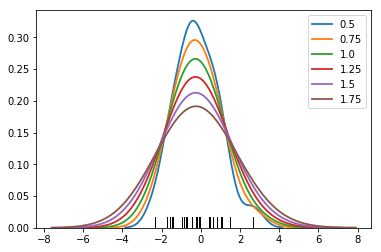

In [10]:
# adjust bandwith to make it less sensitive to high
# frequency points
sns.rugplot(dataset,color = 'black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw = bw, lw= 1.8, label = bw)

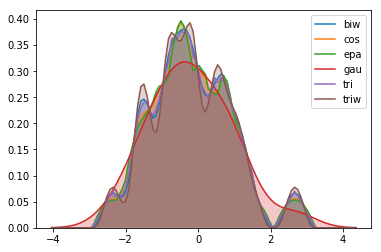

In [13]:
# kernel options
kernel_options= ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset, kernel = kern,label =kern, shade = True)

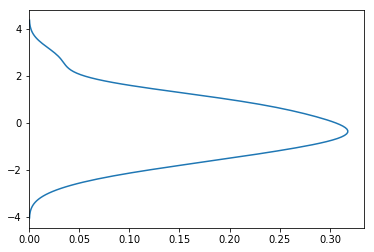

In [14]:
sns.kdeplot(dataset, vertical = True)

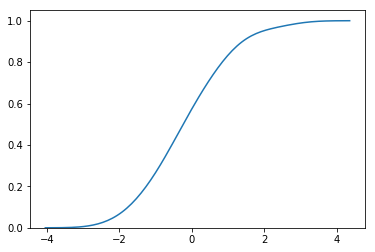

In [16]:
# can create cdf plot
sns.kdeplot(dataset,cumulative= True)

In [17]:
# multivariate density function plot
mean = [0,0]
cov =[[1,0],[0,100]]
dataset2 = np.random.multivariate_normal(mean,cov,1000)

C:\Users\Bingxin\Anaconda2\lib\site-packages\seaborn\distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


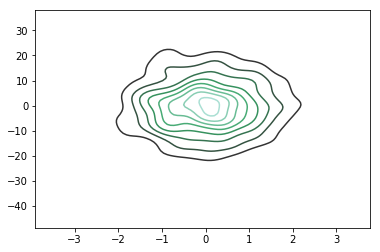

In [18]:
dframe = pd.DataFrame(dataset2,columns = ['X','Y'])
sns.kdeplot(dframe)

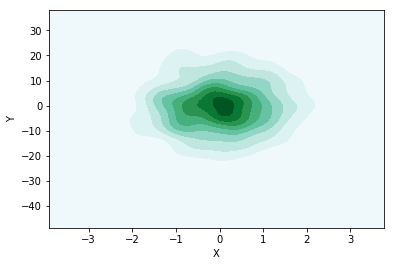

In [19]:
sns.kdeplot(dframe.X,dframe.Y,shade = True)

C:\Users\Bingxin\Anaconda2\lib\site-packages\seaborn\distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


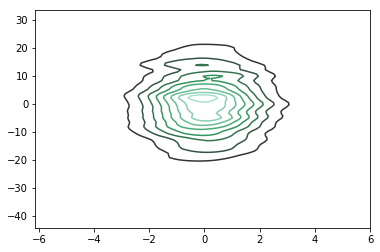

In [20]:
sns.kdeplot(dframe, bw = 1)

C:\Users\Bingxin\Anaconda2\lib\site-packages\seaborn\distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


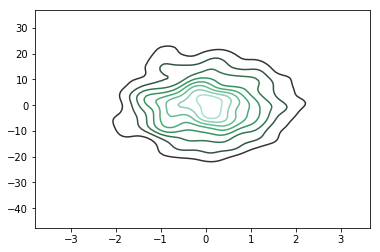

In [21]:
sns.kdeplot(dframe,bw = 'silverman')

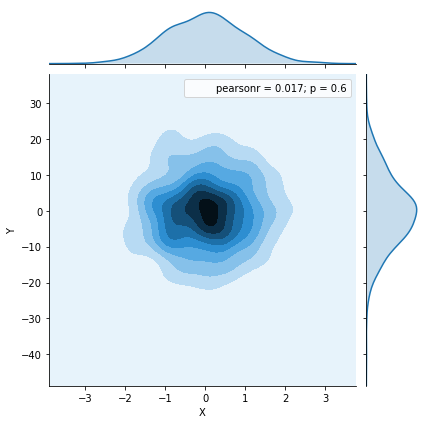

In [22]:
sns.jointplot('X','Y',dframe,kind ='kde')